In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics

In [150]:
df = pd.read_csv(f'./data/finalMergedSet.csv')
df

,date,visitor,home,visitor_points,home_points
0,2015-10-02,Denver Nuggets,LA Clippers,96.0,103.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
3,2015-10-04,Utah Jazz,Los Angeles Lakers,90.0,71.0
4,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
...,...,...,...,...,...
12795,2024-11-04,Boston Celtics,Atlanta Hawks,123.0,93.0
12796,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
12797,2024-11-04,Orlando Magic,Oklahoma City Thunder,86.0,102.0
12798,2024-11-04,San Antonio Spurs,LA Clippers,104.0,113.0


In [156]:
# Take games between 2019 and current year
start_year = 2019
current_year = dt.datetime.now().year

# Convert to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtered the dataframe for games between start year and current year
filtered_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= current_year)]

# Reset data frame
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,date,visitor,home,visitor_points,home_points
0,2019-01-01,Detroit Pistons,Milwaukee Bucks,98.0,121.0
1,2019-01-01,Philadelphia 76ers,LA Clippers,119.0,113.0
2,2019-01-01,Portland Trail Blazers,Sacramento Kings,113.0,108.0
3,2019-01-01,Utah Jazz,Toronto Raptors,116.0,122.0
4,2019-01-01,New York Knicks,Denver Nuggets,108.0,115.0
...,...,...,...,...,...
7810,2024-11-04,Boston Celtics,Atlanta Hawks,123.0,93.0
7811,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
7812,2024-11-04,Orlando Magic,Oklahoma City Thunder,86.0,102.0
7813,2024-11-04,San Antonio Spurs,LA Clippers,104.0,113.0


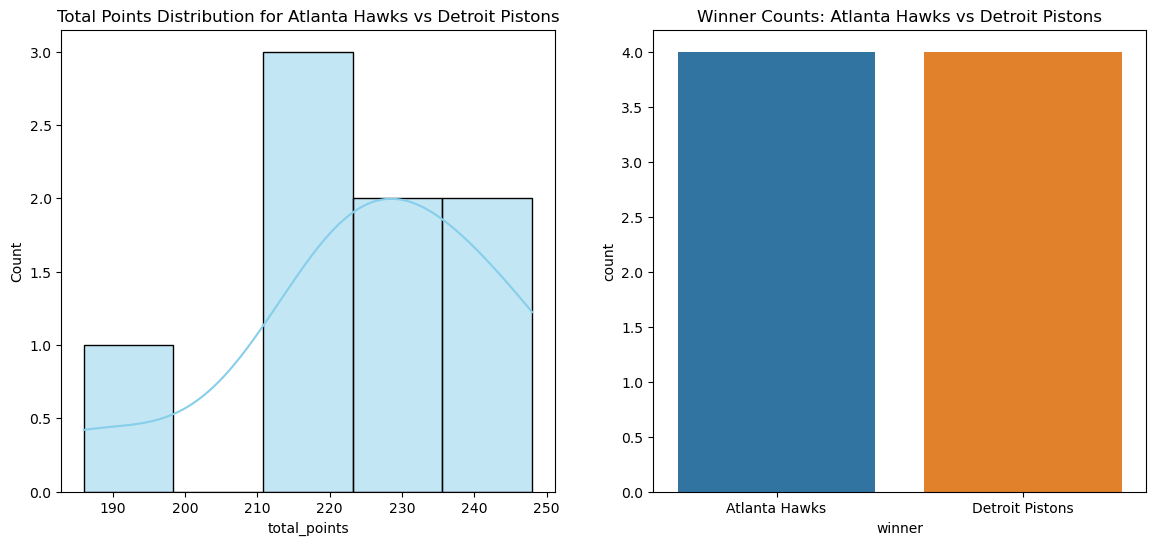

Statistics of Atlanta Hawks vs Detroit Pistons


Mean: 225.625
Standard Deviation: 19.390258968284638
------------------------------------
z-score for 225.0: -0.03
z-score for 226.0: 0.02
z-score for 227.0: 0.07
z-score for 228.0: 0.12
z-score for 229.0: 0.17
z-score for 230.0: 0.23
z-score for 231.0: 0.28
z-score for 232.0: 0.33
z-score for 233.0: 0.38
z-score for 234.0: 0.43
z-score for 235.0: 0.48
z-score for 236.0: 0.54
z-score for 237.0: 0.59
z-score for 238.0: 0.64
z-score for 239.0: 0.69


,date,visitor,home,visitor_points,home_points,total_points,winner
0,2019-10-24,Atlanta Hawks,Detroit Pistons,117.0,100.0,217.0,Atlanta Hawks
1,2019-11-22,Atlanta Hawks,Detroit Pistons,103.0,128.0,231.0,Detroit Pistons
2,2021-04-26,Atlanta Hawks,Detroit Pistons,86.0,100.0,186.0,Detroit Pistons
3,2022-03-07,Atlanta Hawks,Detroit Pistons,110.0,113.0,223.0,Detroit Pistons
4,2022-03-23,Atlanta Hawks,Detroit Pistons,101.0,122.0,223.0,Detroit Pistons
5,2022-10-26,Atlanta Hawks,Detroit Pistons,118.0,113.0,231.0,Atlanta Hawks
6,2022-10-28,Atlanta Hawks,Detroit Pistons,136.0,112.0,248.0,Atlanta Hawks
7,2023-11-14,Atlanta Hawks,Detroit Pistons,126.0,120.0,246.0,Atlanta Hawks


In [162]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Sort by date
    matchup_game = matchup_game.sort_values(by='date').reset_index(drop=True)
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('\n')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    # print('------------------------------------')

    # Find percentage of games between specified range
    # total_games = len(matchup_game)
    # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    # percentage = (len(games_in_range) / total_games) * 100
    # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    # print('------------------------------------')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(filtered_df, away_team, home_team, first_line)

In [153]:
teams = df['visitor'].unique()
teams.sort()
teams

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)